# Visualization

## Matplotlib
### The basics!

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

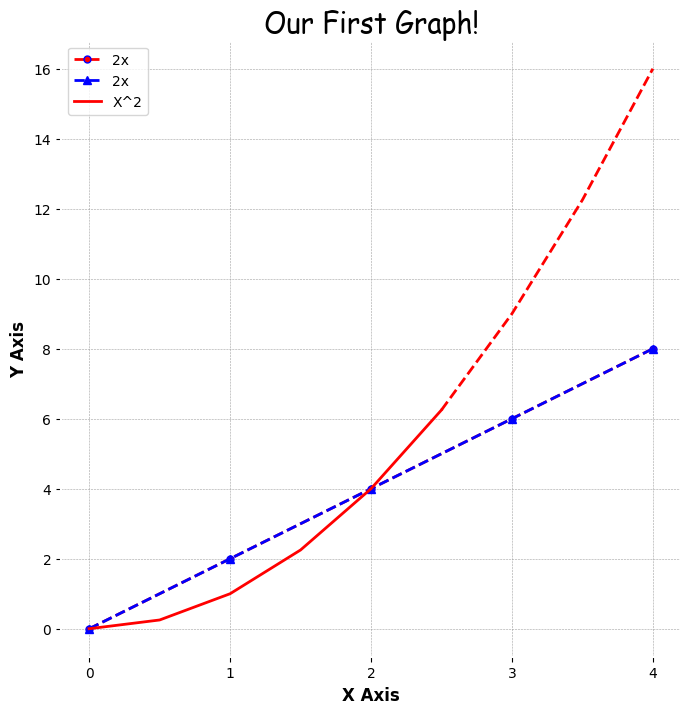

In [115]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,8), dpi=100)

# Line 1

# Keyword Argument Notation
plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)
#[0.  0.5  1.  1.5  2.  2.5  3.  3.5  4.]
# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Our First Graph!', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()


## Real Example

In [116]:
gas = pd.read_csv("gasprices.csv",skiprows=4, header=None )
# Promote the row after the skipped rows to be the header
gas.columns = gas.iloc[0]

# Drop the first row (which is now the duplicated header)
gas = gas.drop(0)
# Reset the index
gas = gas.reset_index(drop=True)
gas.head()


,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


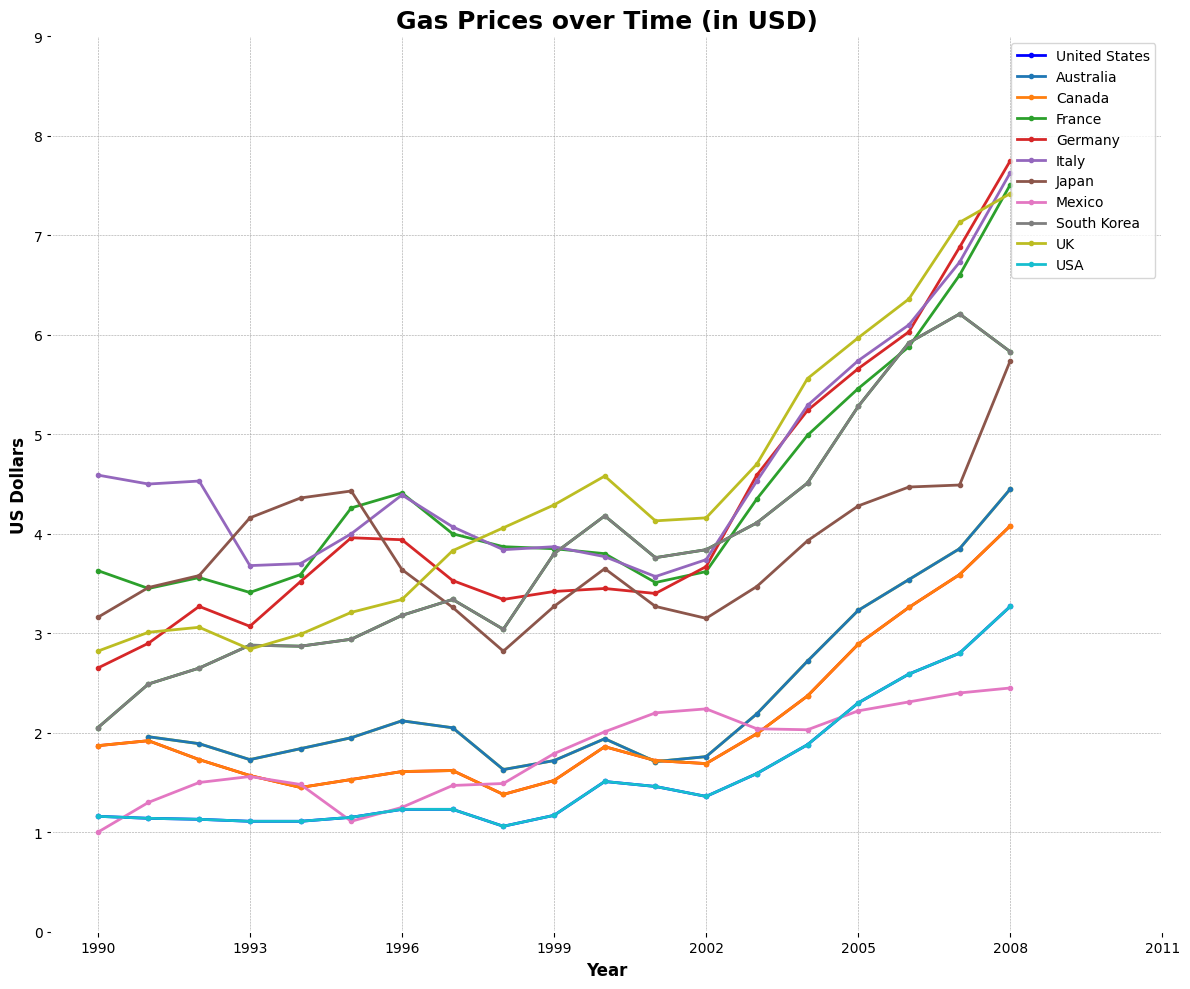

In [117]:
# Convert all data to numeric
gas = gas.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(12, 10))

plt.title('Gas Prices over Time (in USD)', fontdict={'fontweight': 'bold', 'fontsize': 18})

plt.plot(gas.Year, gas.USA, 'b.-', label='United States')
plt.plot(gas.Year, gas.Canada, 'r.-')
plt.plot(gas.Year, gas['South Korea'], 'g.-')
plt.plot(gas.Year, gas.Australia, 'y.-')

# Another Way to plot many values!
countries_to_look_at = gas.drop('Year',axis=1).columns
for country in countries_to_look_at:
    plt.plot(gas.Year, gas[country], marker='.', label=country)

plt.xticks(gas.Year[::3].tolist() + [2011])
plt.xlabel('Year')
plt.ylabel('US Dollars')
plt.yticks(range(0, 10))
plt.legend()

plt.savefig('Gas_price_figure.png', dpi=300)
plt.tight_layout()
plt.show()


## Bar Chart

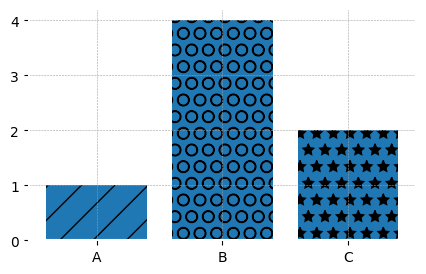

In [118]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)
#barh

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.show()

## Real Example

## Histogram

In [119]:
store= pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


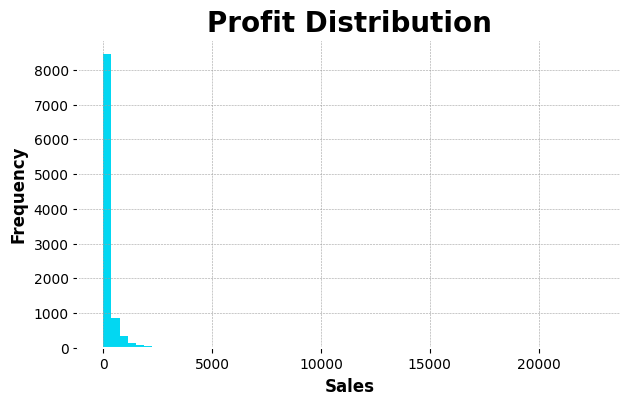

In [120]:

#---------------------------------------------------------------------
#BACKGROUND AND TITLES
plt.figure(figsize=(7,4))
plt.axes(facecolor='white')

plt.title('Profit Distribution',fontdict={'fontsize':20,'fontweight':'bold'})
plt.xlabel('Sales')
plt.ylabel('Frequency')
#--------------------------------------------------------------------------
plt.hist(data=store, x="Sales", color='#02d7f2',bins=60)
plt.show()

## Box and whisker plot

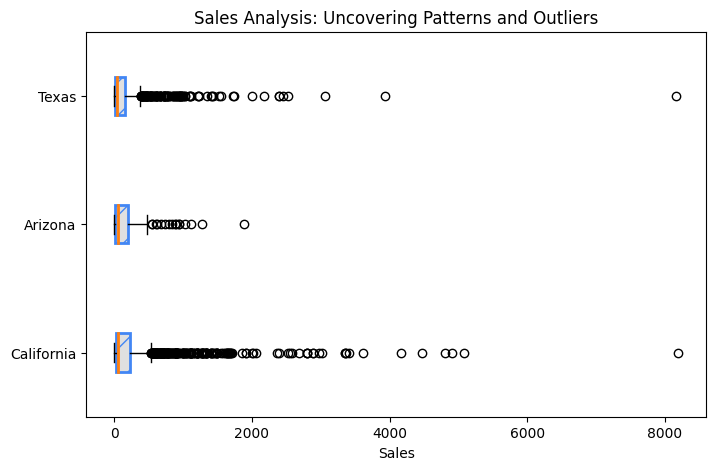

In [121]:
plt.figure(figsize=(8, 5), dpi=100)
plt.style.use('default')

california = store.loc[store.State == "California"]['Sales']
arizona = store.loc[store.State == "Arizona"]['Sales']
texas = store.loc[store.State == "Texas"]['Sales']

bp = plt.boxplot([california, arizona, texas], labels=['California', 'Arizona', 'Texas'],
                 patch_artist=True, medianprops={'linewidth': 2}, vert=False)

plt.title('Sales Analysis: Uncovering Patterns and Outliers')
plt.xlabel('Sales')  # Adjust the label for the horizontal box plot
plt.yticks([1, 2, 3], ['California', 'Arizona', 'Texas'])  # Adjust the y-ticks and labels for the horizontal box plot

for box in bp['boxes']:
    # Change outline color
    box.set(color='#4286f4', linewidth=2)
    # Change fill color
    box.set(facecolor='#e0e0e0')
    # Change hatch
    box.set(hatch='/')

plt.show()

Text(0, 40, 'Message')

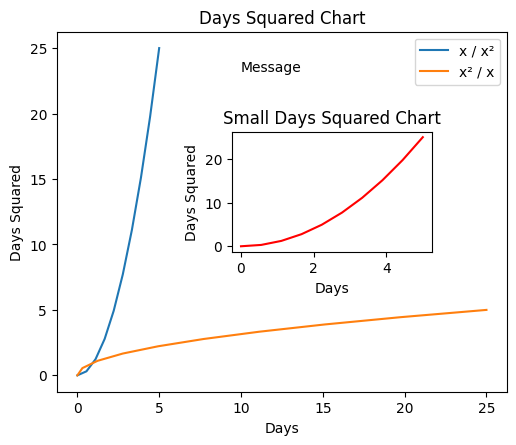

In [122]:
x_1 = np.linspace(0,5,10)
y_1 = x_1**2

fig_1 = plt.figure(figsize=(5,4),dpi=100)

# Adds axes with a left, bottom, width and height that ranges from 0 to 1
# which is the percent of the canvas you want to use
axes_1 = fig_1.add_axes([0.1,0.1,0.9,0.9])

# Set lables and title
axes_1.set_xlabel('Days')
axes_1.set_ylabel('Days Squared')
axes_1.set_title('Days Squared Chart')
# Plot on the axes (If you want a label associated with the legend
# add it with label)
axes_1.plot(x_1,y_1,label='x / x²')

# You can plot to plots using the same axes
axes_1.plot(y_1,x_1,label='x² / x')

axes_1.legend(loc=0)

# You can create axis inside of others
axes_2 = fig_1.add_axes([0.45,0.45,0.4,0.3])
axes_2.set_xlabel('Days')
axes_2.set_ylabel('Days Squared')
axes_2.set_title('Small Days Squared Chart')
axes_2.plot(x_1,y_1,'r')

# Add text to plot from central point of 0,0
axes_2.text(0, 40, 'Message')

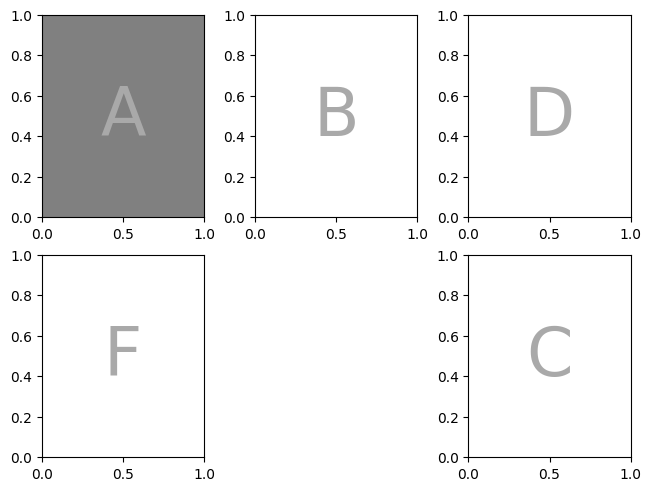

In [123]:
def identify_axes(ax_dict, fontsize=48):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    ABD
    F.C
    """
)
axd['A'].set_facecolor('gray')
identify_axes(axd)

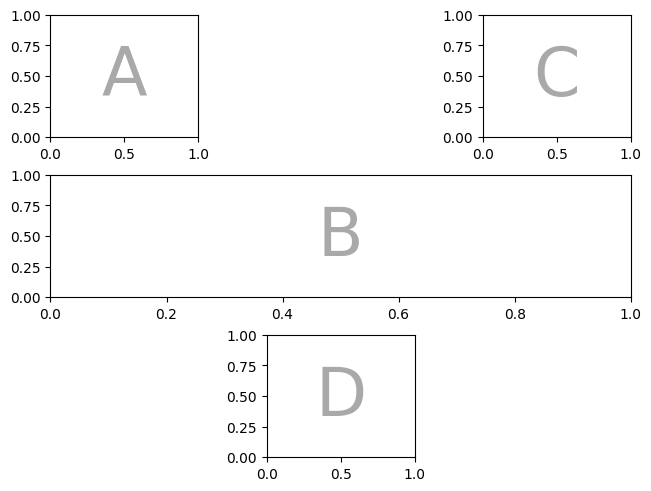

In [124]:
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    A.C
    BBB
    .D.
    """
)
identify_axes(axd)

In [125]:

def calculate_cumulative_return(time_series):
    # Calculate cumulative product returns using cumprod()
    cumprod_returns = np.cumprod(time_series)

    # Calculate cumulative product returns using prod()
    prod_returns = np.prod(time_series)

    return cumprod_returns, prod_returns

# Example usage
time_series = [1.1, 0.9, 1.2, 1.05, 1.15]
cumprod_returns, prod_returns = calculate_cumulative_return(time_series)

print("Cumulative Product Returns:", cumprod_returns)
print("Product Returns:", prod_returns)

Cumulative Product Returns: [1.1     0.99    1.188   1.2474  1.43451]
Product Returns: 1.4345100000000002


## Seaborn

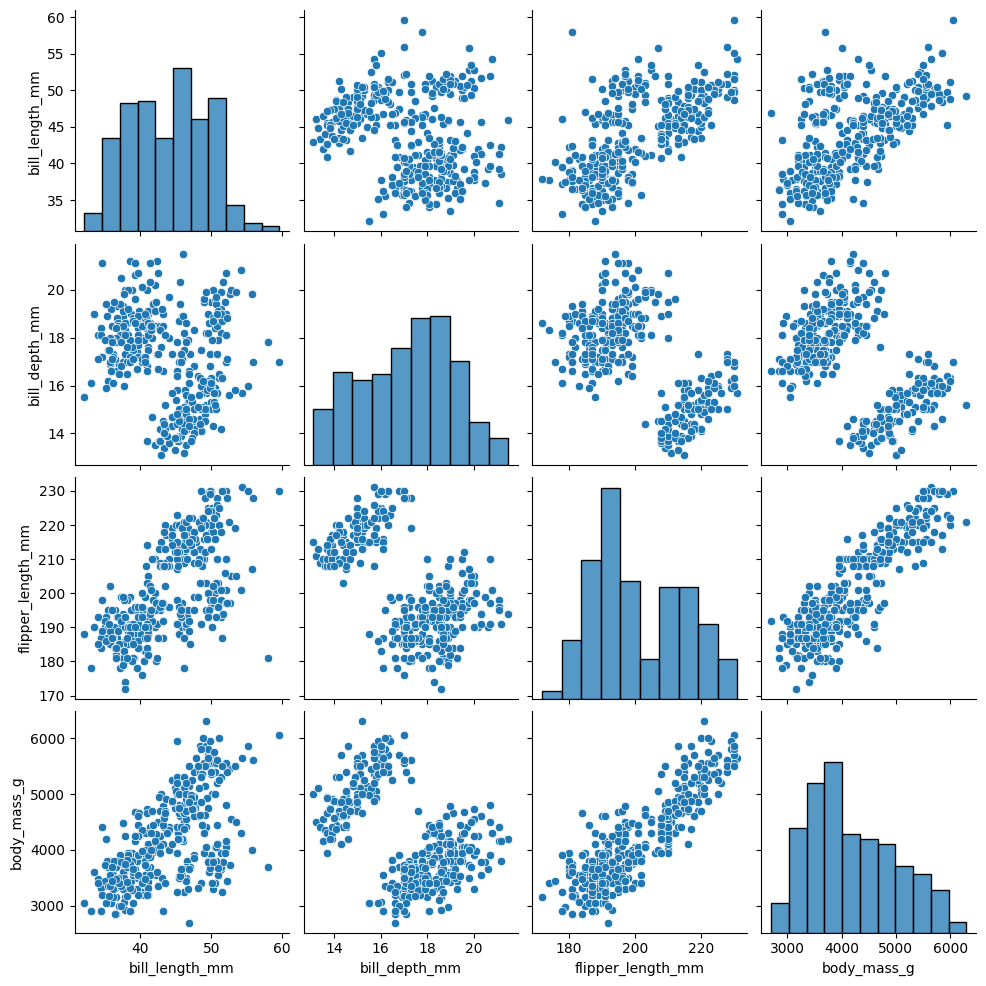

In [126]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)
plt.show()

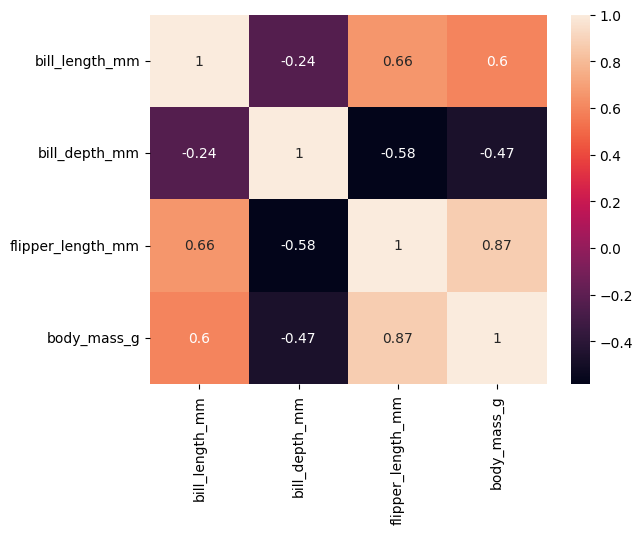

In [128]:
al=sns.heatmap(penguins.corr(),annot=True)
plt.show()

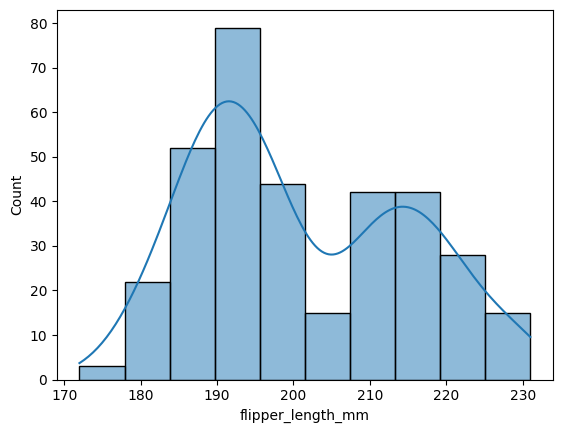

In [97]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)
plt.show()

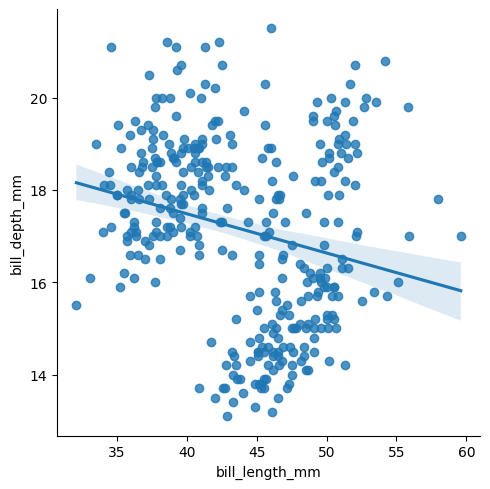

In [98]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
plt.show()

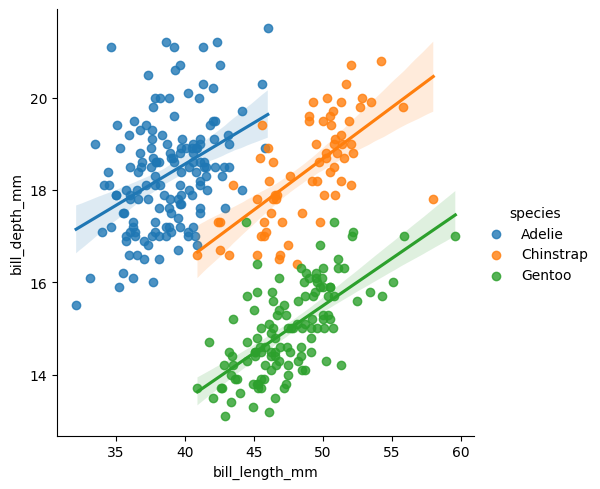

In [99]:
sns.lmplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
plt.show()

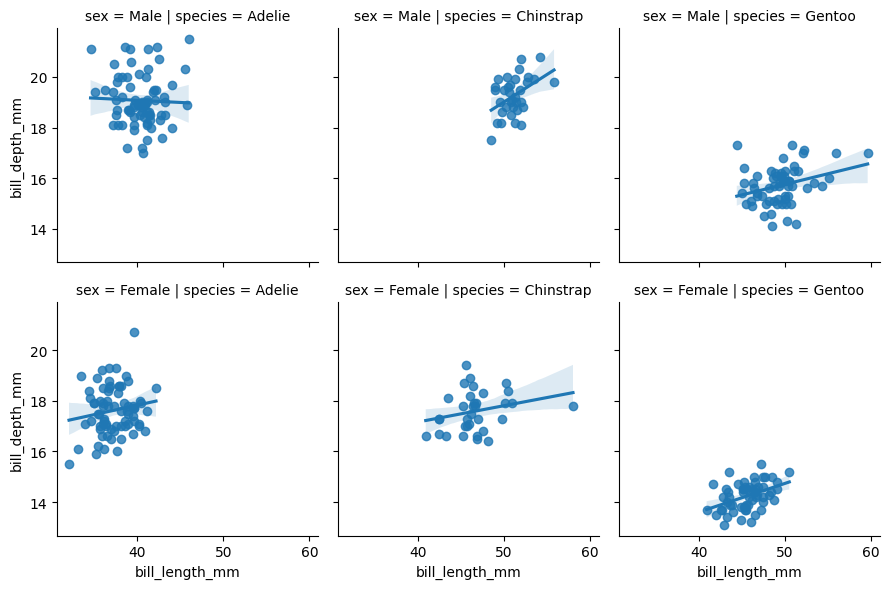

In [100]:
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
)
plt.show()

## Plotly

In [101]:
import plotly.express as px
df = px.data.tips()
fig = px.pie(df, values='tip', names='day', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [103]:
import plotly.graph_objects as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['AAPL.Open'], high=df['AAPL.High'],
                low=df['AAPL.Low'], close=df['AAPL.Close'])
                     ])

fig.show()